In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [5]:
pd.set_option('display.max_rows', 1000)


In [6]:
pd.options.display.max_columns = 1000

In [7]:
mtf =pd.read_csv('Mobile_Telecommunication_Franchise_Poletop_Installation_Locations.csv', delimiter = ',', header = 0)
imp =pd.read_csv('Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv', delimiter = ',', header = 0)

In [8]:
mtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             8849 non-null   int64  
 1   Reservation Date               8849 non-null   object 
 2   Franchisee Name                8849 non-null   object 
 3   Pole Class                     8849 non-null   object 
 4   Borough                        8849 non-null   object 
 5   X Coord.                       8849 non-null   int64  
 6   Y Coord.                       8849 non-null   int64  
 7   Latitude                       8849 non-null   float64
 8   Longitude                      8849 non-null   float64
 9   Zone                           8849 non-null   object 
 10  On street                      8849 non-null   object 
 11  Cross street 1                 8849 non-null   object 
 12  Cross street 2                 8839 non-null   o

In [21]:
mtf.head(10)

,Id,Reservation Date,Franchisee Name,Pole Class,Borough,X Coord.,Y Coord.,Latitude,Longitude,Zone,On street,Cross street 1,Cross street 2,Park Advisory,Historic Landmark Advisory,Scenic Landmark Advisory,BID Advisory,School Advisory,Construction Completed? (Y/N),Zipcode,Community Board,Council District
0,17638,12/29/2017,Extenet II,CITY,Brooklyn,989062,160733,40.607850,-73.982670,B,Ave P,W 9th St,W 10th St,NaN,NaN,NaN,NaN,NaN,N,11204,311,44
1,16823,01/08/2018,Mobilitie II,CITY,Brooklyn,991172,162849,40.613657,-73.975068,B,Dahill Road,61st Street,24th Avenue,NaN,NaN,NaN,NaN,NaN,Y,11204,311,44
2,16747,01/08/2018,Mobilitie II,CITY,Brooklyn,990161,162641,40.613086,-73.978710,B,23rd Avenue,64th Street,65th Street,NaN,NaN,NaN,NaN,NaN,Y,11204,311,44
3,15397,11/22/2017,Mobilitie I,CITY,Brooklyn,989703,161765,40.610682,-73.980360,B,Avenue O,W 6th Street,W 7th Street,NaN,NaN,NaN,NaN,NaN,Y,11204,311,44
4,15901,11/16/2017,Extenet II,UTILITY,Brooklyn,988571,160579,40.607428,-73.984438,B,W 11th St,Ave P,Kings Hwy,NaN,NaN,NaN,NaN,NaN,Y,11223,311,44
5,15392,11/22/2017,Mobilitie I,CITY,Brooklyn,989936,160789,40.608003,-73.979522,B,Avenue P,W 6th Street,W 5th Street,NaN,NaN,NaN,NaN,NaN,N,11223,311,44
6,15349,11/22/2017,Mobilitie I,CITY,Brooklyn,988461,159838,40.605394,-73.984835,B,Quentin Road,W 12th Street,W 11th Street,NaN,NaN,NaN,NaN,NaN,Y,11223,311,44
7,14273,10/28/2016,Mobilitie I,UTILITY,Brooklyn,987829,160458,40.607096,-73.987111,B,Stillwell Av,Avenue P,Kings Hwy,NaN,NaN,NaN,NaN,LUCRETIA MARCIGLIANO CAMPUS,Y,11223,311,44
8,16761,01/08/2018,Mobilitie II,CITY,Brooklyn,990243,169616,40.632231,-73.978409,B,Dahill Road,43rd Street,44th Street,NaN,NaN,NaN,NaN,NaN,Y,11218,312,44
9,20792,01/28/2019,ZenFi,UTILITY,Brooklyn,984417,169605,40.632203,-73.999398,B,57 St,12 Av,11 Av,NaN,NaN,NaN,NaN,NaN,Y,11219,312,44


In [22]:
imp.head(20)

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,Public Wi-Fi in NYC Count,Number of Free Public Wi-Fi Access Points in a Pedestrian Corridor,Available Free Public Wi-Fi in a Pedestrian Corridor (Y/N),Estimated Number of Businesses,Number of Households,Total Accounts,Account Density,Account Density Quartile,Population Projections 2050,Households Receiving Benefits,Estimated Lifeline Eligible Households,Supportive Housing (NYCDHS),Low-Income Housing (NYCHA),Presence of IBZs,Number of NYCHA Buildings,Number of Public Schools,Number of DCAS Buildings,Number of NYC H+H Buildings,City Buildings with High Rooftops (7+ Floors) Capacity by Quartile,Street Furniture: FDNY Call Boxes,Street Furniture: Parking Pay Stations,Street Furniture: Bus Stop Shelters,Street Furniture: Bike Shelters,Street Furniture: City Benches,LinkNYC Kiosks,WalkNYC Sign Locations,Poles Reserved by Mobile Telecom Franchisee,Pole with Equipment Installed by Mobile Telecom Franchise,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Percentage Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,11115.0,14212.0,748.0,High,25509.0,42.0,225.0,0.0,0.0,False,0.0,1.0,4.0,0.0,High,45.0,65.0,6.0,0.0

In [11]:
imp.head(3)


,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,Public Wi-Fi in NYC Count,Number of Free Public Wi-Fi Access Points in a Pedestrian Corridor,Available Free Public Wi-Fi in a Pedestrian Corridor (Y/N),Estimated Number of Businesses,Number of Households,Total Accounts,Account Density,Account Density Quartile,Population Projections 2050,Households Receiving Benefits,Estimated Lifeline Eligible Households,Supportive Housing (NYCDHS),Low-Income Housing (NYCHA),Presence of IBZs,Number of NYCHA Buildings,Number of Public Schools,Number of DCAS Buildings,Number of NYC H+H Buildings,City Buildings with High Rooftops (7+ Floors) Capacity by Quartile,Street Furniture: FDNY Call Boxes,Street Furniture: Parking Pay Stations,Street Furniture: Bus Stop Shelters,Street Furniture: Bike Shelters,Street Furniture: City Benches,LinkNYC Kiosks,WalkNYC Sign Locations,Poles Reserved by Mobile Telecom Franchisee,Pole with Equipment Installed by Mobile Telecom Franchise,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Percentage Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,"24,140","67,407.17","11,115",0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,"3,097","11,115","14,212",748,High,"25,509",42,225,0,0,False,0.0,1.0,4.0,0.0,High,45.0,65.0,6.0,

In [12]:
#imp rows edtited to remove commas and change data types to numeric values
imp['Total Population'] = imp['Total Population'].str.replace(',', '').astype(int)
imp['Population Density (per Sq. Mi.)'] = imp['Population Density (per Sq. Mi.)'].str.replace(',', '').astype(float)
imp['Total Number of Households'] = imp['Total Number of Households'].str.replace(',', '').astype(int)
imp['Number of Households'] = imp['Number of Households'].str.replace(',', '').astype(float)
imp['Total Accounts'] = imp['Total Accounts'].str.replace(',', '').astype(float) 
imp['Estimated Number of Businesses'] = imp['Estimated Number of Businesses'].str.replace(',', '').astype(float)
imp['Account Density'] = imp['Account Density'].str.replace(',', '').astype(float)
imp['Population Projections 2050'] = imp['Population Projections 2050'].str.replace(',', '').astype(float)
imp['Households Receiving Benefits'] = imp['Households Receiving Benefits'].str.replace(',', '').astype(float)


In [13]:
imp['Estimated Lifeline Eligible Households'] = imp['Estimated Lifeline Eligible Households'].str.replace(',', '').astype(float)
imp['Supportive Housing (NYCDHS)'] = imp['Supportive Housing (NYCDHS)'].str.replace(',', '').astype(float)
imp['Low-Income Housing (NYCHA)'] = imp['Low-Income Housing (NYCHA)'].str.replace(',', '').astype(float)


In [14]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 78 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Neighborhood Tabulation Area Code (NTA Code)                                                                 195 non-null    object 
 1   Neighborhood Tabulation Area Name (NTA NAME)                                                                 195 non-null    object 
 2   Borough Name                                                                                                 195 non-null    object 
 3   Total Population                                                                                             195 non-null    int32  
 4   Population Density (per Sq. Mi.)                              

In [15]:
imp.mean()

Total Population                                                                                                 43420.728205
Population Density (per Sq. Mi.)                                                                                 44394.961598
Total Number of Households                                                                                       16114.897436
Area (Sq. Mi.)                                                                                                       1.550462
Street Mileage                                                                                                      45.784615
Home Broadband Adoption (Percentage of Households)                                                                   0.686769
Mobile Broadband Adoption (Percentage of Households)                                                                 0.695333
Mobile Dependent Households (Percentage of Households)                                                               0

In [16]:
Create a new metric to determine best neighborhoods with future revenue
Keep neighborhoods where (Population 2030 to 2050 - Total Population) > Average (Population 2030 to 2050 - Total Population)
Population Density per Square mile can also be a metric for Neighborhood selection




SyntaxError: invalid syntax (<ipython-input-16-eac555137089>, line 1)

In [65]:
mtf['Borough'].value_counts(dropna=False)

Manhattan        2598
Bronx            2047
Queens           1806
Brooklyn         1515
Staten_Island     883
Name: Borough, dtype: int64

In [40]:
imp.groupby('Borough Name')['Poles Reserved by Mobile Telecom Franchisee'].sum()

Borough Name
Bronx            346.0
Brooklyn         408.0
Manhattan        358.0
Queens           598.0
Staten Island     11.0
Name: Poles Reserved by Mobile Telecom Franchisee, dtype: float64

In [39]:
imp.groupby('Borough Name')['Pole with Equipment Installed by Mobile Telecom Franchise'].sum() 

Borough Name
Bronx            1059.0
Brooklyn          709.0
Manhattan        1975.0
Queens            668.0
Staten Island     480.0
Name: Pole with Equipment Installed by Mobile Telecom Franchise, dtype: float64

In [38]:
imp.groupby('Borough Name')['Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise'].mean()

Borough Name
Bronx            1.230000
Brooklyn         0.569608
Manhattan        2.202414
Queens           0.433793
Staten Island    0.405789
Name: Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise, dtype: float64

In [46]:
imp.groupby('Borough Name')['Mobile Dependent Households (Percentage of Households)'].median()

Borough Name
Bronx            0.065
Brooklyn         0.050
Manhattan        0.040
Queens           0.050
Staten Island    0.030
Name: Mobile Dependent Households (Percentage of Households), dtype: float64

In [51]:
imp['Population Growth'] = imp['Population Projections 2050']-imp['Total Population']

In [52]:
imp.head(5)

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,Public Wi-Fi in NYC Count,Number of Free Public Wi-Fi Access Points in a Pedestrian Corridor,Available Free Public Wi-Fi in a Pedestrian Corridor (Y/N),Estimated Number of Businesses,Number of Households,Total Accounts,Account Density,Account Density Quartile,Population Projections 2050,Households Receiving Benefits,Estimated Lifeline Eligible Households,Supportive Housing (NYCDHS),Low-Income Housing (NYCHA),Presence of IBZs,Number of NYCHA Buildings,Number of Public Schools,Number of DCAS Buildings,Number of NYC H+H Buildings,City Buildings with High Rooftops (7+ Floors) Capacity by Quartile,Street Furniture: FDNY Call Boxes,Street Furniture: Parking Pay Stations,Street Furniture: Bus Stop Shelters,Street Furniture: Bike Shelters,Street Furniture: City Benches,LinkNYC Kiosks,WalkNYC Sign Locations,Poles Reserved by Mobile Telecom Franchisee,Pole with Equipment Installed by Mobile Telecom Franchise,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Percentage Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings,Population Growth
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,11115.0,14212.0,748.0,High,25509.0,42.0,225.0,0.0,0.0,False,0.0,1.0,4.0,0.0,High

In [72]:
imp['Population Growth'].mean()

3622.2659574468084

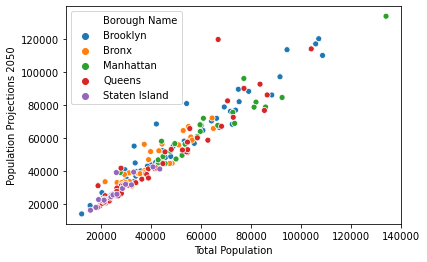

In [59]:
sns.scatterplot(x = "Total Population", y = 'Population Projections 2050', data=imp, hue='Borough Name')
plt.show()

In [89]:
high_growth = imp['Population Growth'] > 3622
imp[high_growth]

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,Public Wi-Fi in NYC Count,Number of Free Public Wi-Fi Access Points in a Pedestrian Corridor,Available Free Public Wi-Fi in a Pedestrian Corridor (Y/N),Estimated Number of Businesses,Number of Households,Total Accounts,Account Density,Account Density Quartile,Population Projections 2050,Households Receiving Benefits,Estimated Lifeline Eligible Households,Supportive Housing (NYCDHS),Low-Income Housing (NYCHA),Presence of IBZs,Number of NYCHA Buildings,Number of Public Schools,Number of DCAS Buildings,Number of NYC H+H Buildings,City Buildings with High Rooftops (7+ Floors) Capacity by Quartile,Street Furniture: FDNY Call Boxes,Street Furniture: Parking Pay Stations,Street Furniture: Bus Stop Shelters,Street Furniture: Bike Shelters,Street Furniture: City Benches,LinkNYC Kiosks,WalkNYC Sign Locations,Poles Reserved by Mobile Telecom Franchisee,Pole with Equipment Installed by Mobile Telecom Franchise,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Percentage Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings,Population Growth
1,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,Brooklyn,66293,29178.73,26150,2.27,80,0.74,Medium High,0.62,Low,0.04,Medium Low,1.8,Low,1.1,Low,3,Medium High,0.19,Medium High,0.99,0.76,3,18,0,False,2474.0,26150.0,28624.0,358.0,Medium Low,71948.0,711

In [ ]:
imp.columns

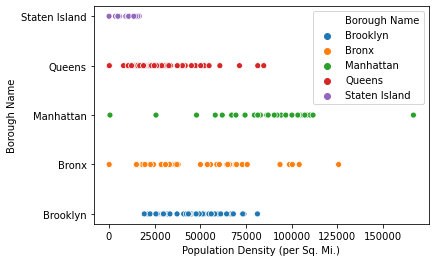

In [18]:
sns.scatterplot(x = 'Population Density (per Sq. Mi.)', y = "Borough Name", data=imp, hue='Borough Name')
plt.show()

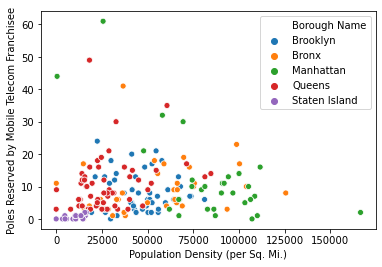

In [19]:
sns.scatterplot(x = 'Population Density (per Sq. Mi.)', y = 'Poles Reserved by Mobile Telecom Franchisee', data=imp, hue='Borough Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

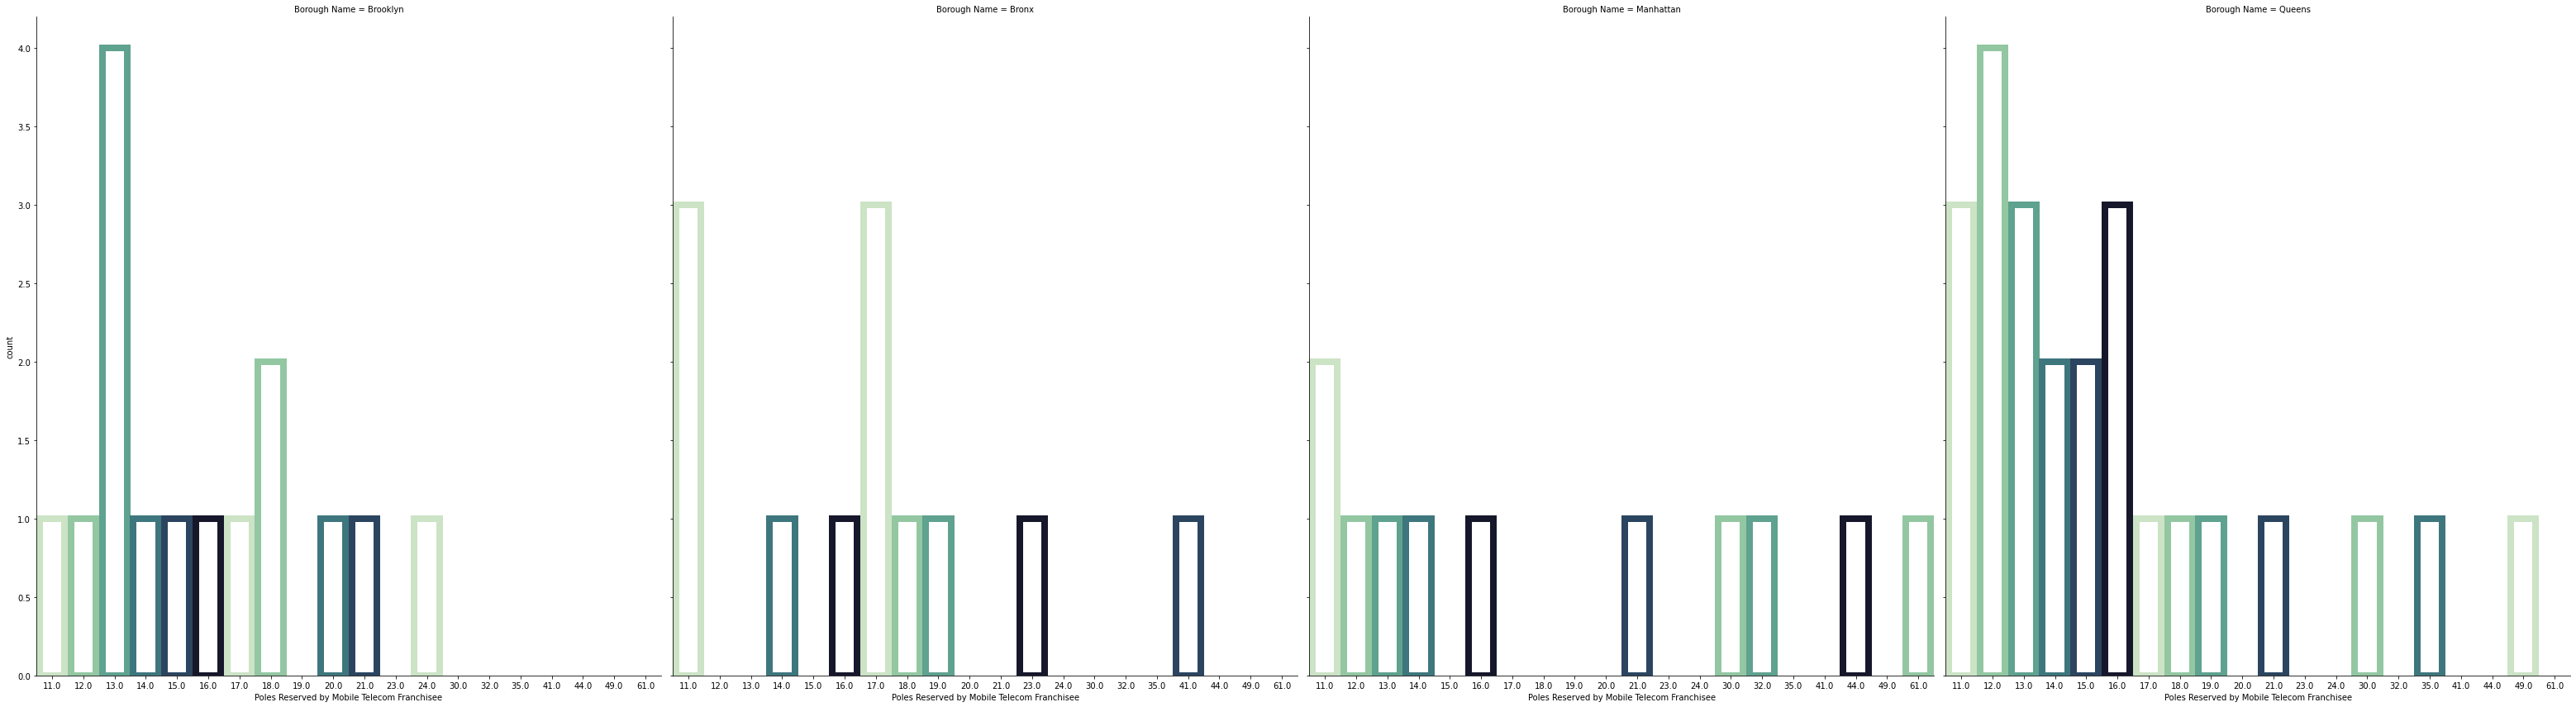

In [20]:
g = sns.catplot('Poles Reserved by Mobile Telecom Franchisee', col='Borough Name', col_wrap=4, data=imp[#(FINAL['renta']> 175000) & 
    (imp['Poles Reserved by Mobile Telecom Franchisee']>10)],kind="count", height=12, aspect=.9, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))